*   Marcelo Kiochi Hatanaka nº 10295645
*   Rodrigo Mendes Andrade nº 10262721
*   Marcelo Isaias de Moraes Junior nº 10550218

*  Link para a implementação sequencial (EDA): https://www.edaplayground.com/x/h9DG
*  Link para a implementação em paralelo (EDA): https://www.edaplayground.com/x/agC5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio
import cv2
from skimage import data, color
from skimage.transform import rescale, resize

Visualização do resultado para o teste da Implementação Sequencial

In [2]:
altura = 240
largura = 320
n_imagens = 1       #nro de imagens de entrada
n_img_out = 1       #nro de imagens de saida
num_arquivos = 4    #nro de arquivos por imagem de entrada

In [5]:
# le imagens de entrada ja pre processadas

imagens = []
arquivo_entrada = list("inputImg1.txt")
t = len(arquivo_entrada)

for k in range(0, n_imagens):
  vet = []
  for l in range(0, num_arquivos):

    img_file = open("".join(arquivo_entrada), "r")
    
    for x in img_file:
      y = x.split()
      for z in y:
        vet.append(z)

    img_file.close()
    arquivo_entrada[t-5] = str(int(arquivo_entrada[t-5])+1)

  m=0
  img_entrada = np.zeros((altura, largura), dtype=np.int32)
  for i in range(0, altura):
    for j in range(0, largura):
      img_entrada[i][j] = int(vet[m])
      m +=1
  
  imagens.append(img_entrada)
  arquivo_entrada[t-5] = str(int(arquivo_entrada[t-5])-(num_arquivos))
  arquivo_entrada[t-6] = chr(ord(arquivo_entrada[t-6])+1)

In [6]:
# le imagem resultante
imagens_saida = []
arquivo_saida = list("outputImg.txt")
t = len(arquivo_saida)

for l in range(0, n_img_out):
  img_file2 = open("".join(arquivo_saida), "r")
  
  vet = []
  for x in img_file2:
    y = x.split()
    for z in y:
      vet.append(z)

  k=0
  img_saida = np.zeros((altura, largura), dtype=np.int32)
  for i in range(0, altura):
    for j in range(0, largura):
      img_saida[i][j] = int(vet[k])
      k +=1
  
  imagens_saida.append(img_saida)
  img_file2.close()

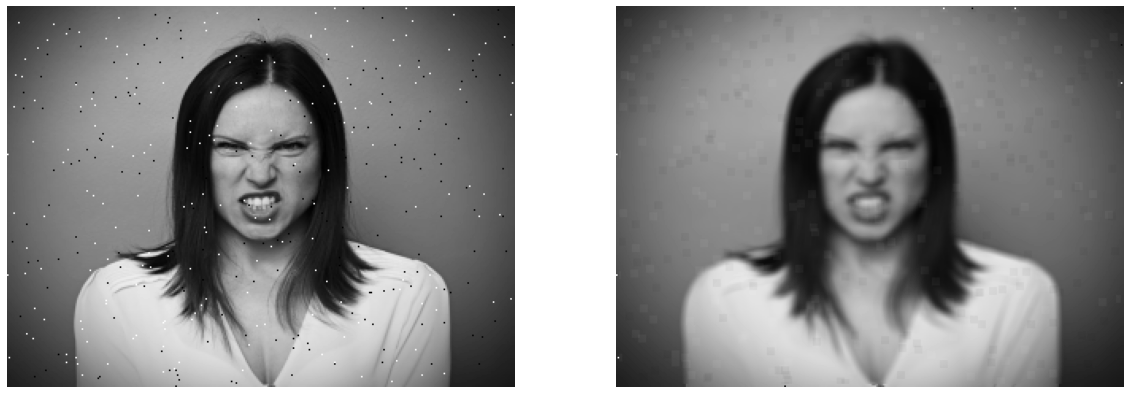

In [8]:
#mostra imagem resultante
plt.figure(figsize=(20, 10*n_img_out*2))
for i in range (0, n_img_out):
  plt.subplot(n_img_out*2, 2, 2*i+1); plt.imshow(imagens[i%n_imagens], cmap='gray', vmin=0, vmax=255); plt.axis('off')
  plt.subplot(n_img_out*2, 2, 2*i+2); plt.imshow(imagens_saida[i], cmap='gray', vmin=0, vmax=255); plt.axis('off')

In [9]:
#implementa o filtro em python

def filtro_media(img, tam_filtro=3):
  borda = tam_filtro//2

  n, m = img.shape

  nova_img = np.copy(img)

  for i in range(borda, n-borda):
    for j in range(borda, m-borda):
      soma = 0
      for k in range(-borda, borda+1):
        for l in range(-borda, borda+1):
          soma += img[i+k][j+l]

      nova_img[i][j] = soma/(tam_filtro*tam_filtro)

  return nova_img.astype(np.uint8)

In [10]:
#processa as imagens em python

imagens_py = []

for i in range(0, n_imagens):
  img3 = filtro_media(imagens[i], 5)
  imagens_py.append(img3)

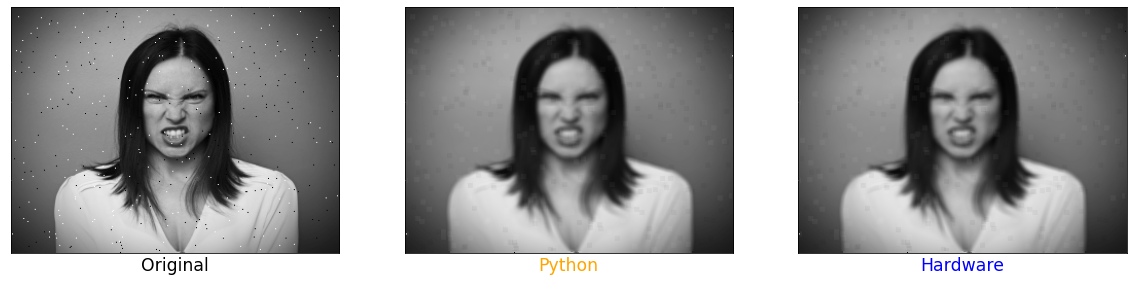

In [11]:
# compara imagens processadas em python com as processadas em hardware

plt.figure(figsize=(20, 5*n_img_out))
for i in range(0, n_img_out):
  plt.subplot(n_img_out, 3, i*3+1); plt.imshow(imagens[i%n_imagens], cmap='gray', vmin=0, vmax=255)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("Original", color='black', size='xx-large')  

  plt.subplot(n_img_out, 3, i*3+2); plt.imshow(imagens_py[i%n_imagens], cmap='gray', vmin=0, vmax=255)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("Python", color='orange', size='xx-large')

  plt.subplot(n_img_out, 3, i*3+3); plt.imshow(imagens_saida[i], cmap='gray', vmin=0, vmax=255)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("Hardware", color='blue', size='xx-large')

In [12]:
def root_squared_error(image_ref, image_mod):
  temp_power = np.power(image_mod.astype(np.float) - image_ref.astype(np.float), 2)

  temp_sum = np.sum(temp_power)
  
  RSE = np.sqrt(temp_sum)
  return RSE

In [13]:
for i in range(0, n_img_out):
  print("Erro imagem %d: %.4f"%( i+1, root_squared_error(imagens_py[i%n_imagens], imagens_saida[i])))

Erro imagem 1: 0.0000


Visualização dos resultados para os testes da Implementação em Paralelo

In [15]:
altura = 240
largura = 320
n_imagens = 3       #nro de imagens de entrada
n_img_out = 6       #nro de imagens de saida
num_arquivos = 4    #nro de arquivos por imagem de entrada

In [16]:
# le imagens de entrada ja pre processadas

imagens = []
arquivo_entrada = list("inputImgA1.txt")
t = len(arquivo_entrada)

for k in range(0, n_imagens):
  vet = []
  for l in range(0, num_arquivos):

    img_file = open("".join(arquivo_entrada), "r")
    
    for x in img_file:
      y = x.split()
      for z in y:
        vet.append(z)

    img_file.close()
    arquivo_entrada[t-5] = str(int(arquivo_entrada[t-5])+1)

  m=0
  img_entrada = np.zeros((altura, largura), dtype=np.int32)
  for i in range(0, altura):
    for j in range(0, largura):
      img_entrada[i][j] = int(vet[m])
      m +=1
  
  imagens.append(img_entrada)
  arquivo_entrada[t-5] = str(int(arquivo_entrada[t-5])-(num_arquivos))
  arquivo_entrada[t-6] = chr(ord(arquivo_entrada[t-6])+1)

In [17]:
# le n imagens resultantes
imagens_saida = []
arquivo_saida = list("outputImgA.txt")
t = len(arquivo_saida)

for l in range(0, n_img_out):
  img_file2 = open("".join(arquivo_saida), "r")
  
  vet = []
  for x in img_file2:
    y = x.split()
    for z in y:
      vet.append(z)

  k=0
  img_saida = np.zeros((altura, largura), dtype=np.int32)
  for i in range(0, altura):
    for j in range(0, largura):
      img_saida[i][j] = int(vet[k])
      k +=1
  
  imagens_saida.append(img_saida)
  img_file2.close()
  arquivo_saida[t-5] = chr(ord(arquivo_saida[t-5])+1)

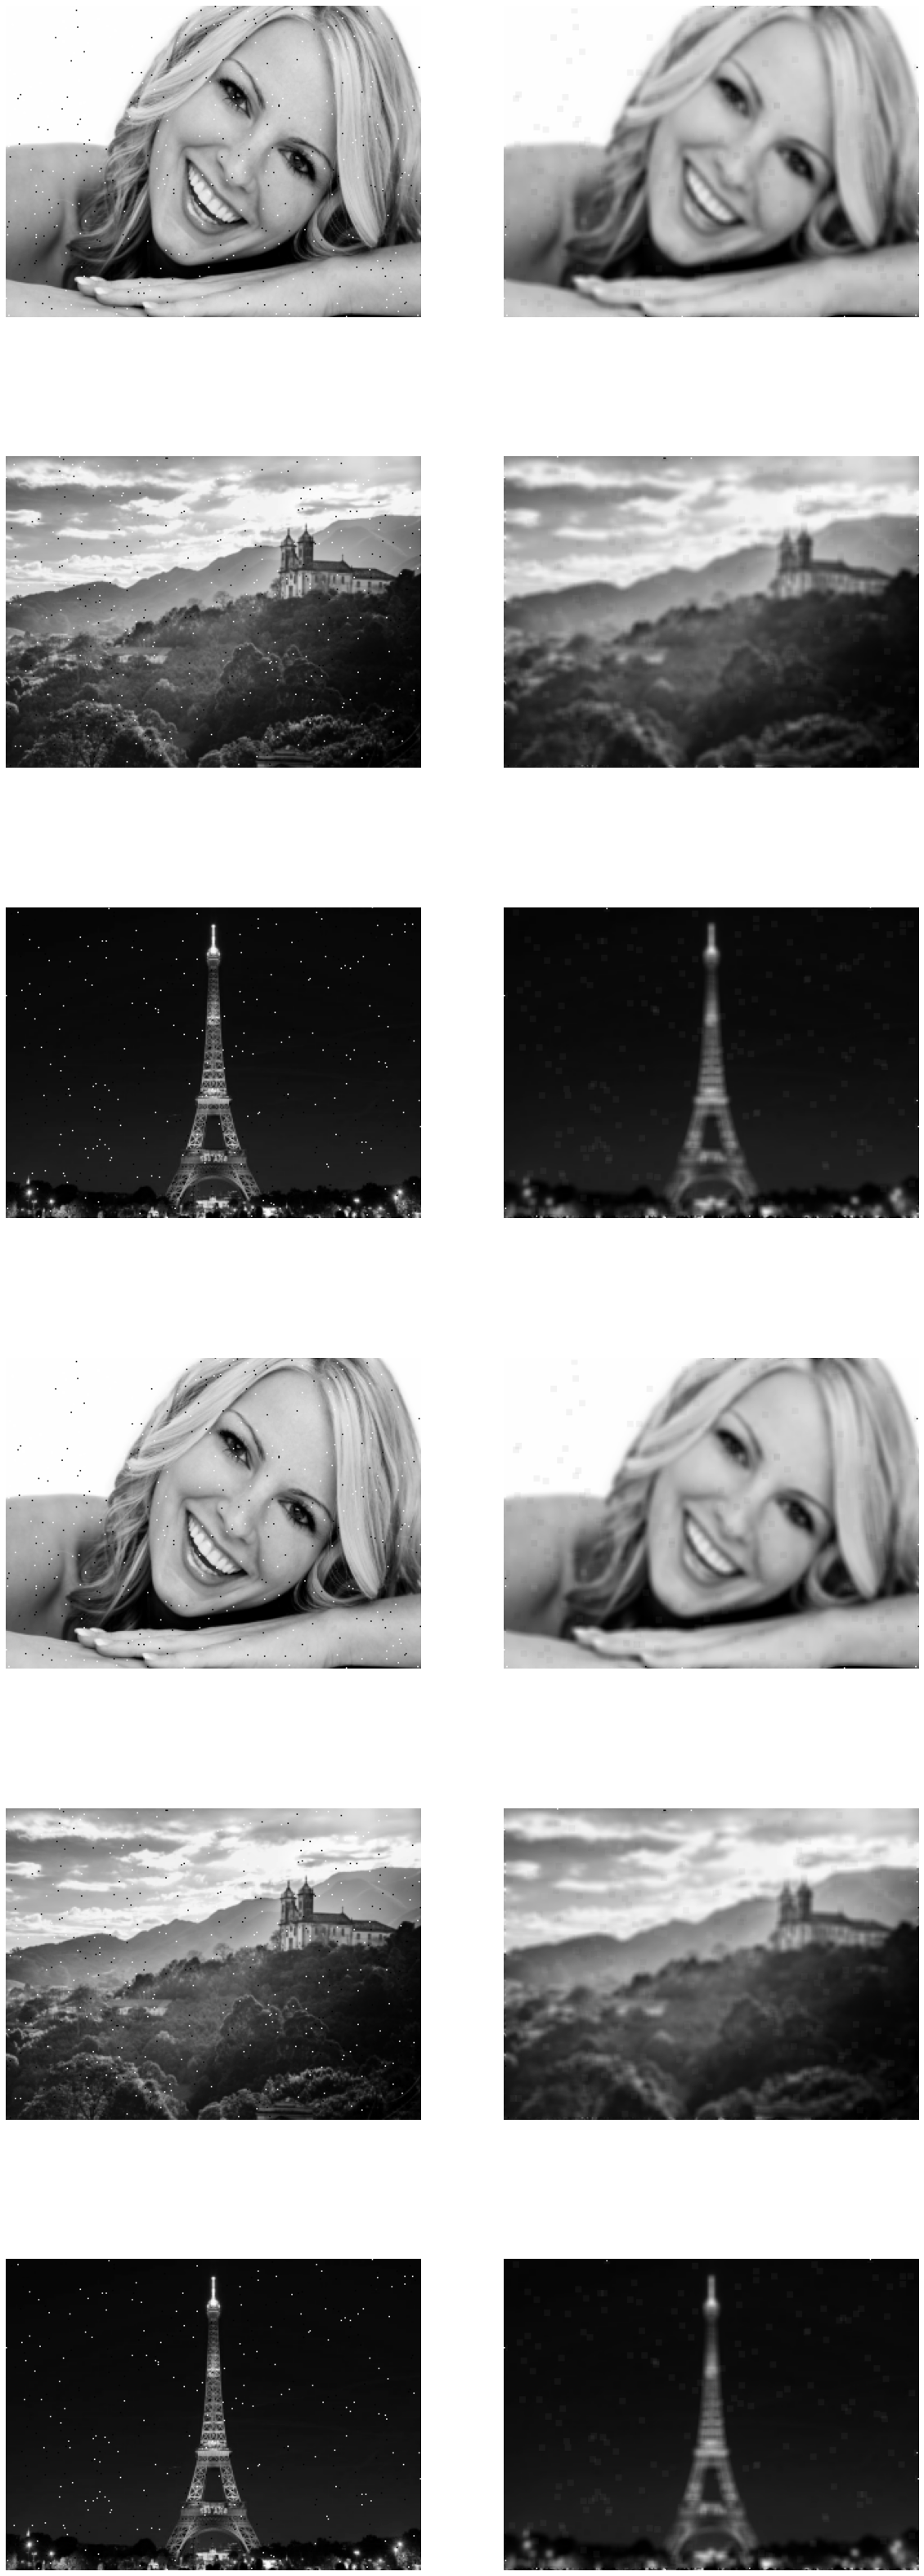

In [18]:
#mostra imagens resultante
plt.figure(figsize=(20, 10*n_img_out*2))
for i in range (0, n_img_out):
  plt.subplot(n_img_out*2, 2, 2*i+1); plt.imshow(imagens[i%n_imagens], cmap='gray', vmin=0, vmax=255); plt.axis('off')
  plt.subplot(n_img_out*2, 2, 2*i+2); plt.imshow(imagens_saida[i], cmap='gray', vmin=0, vmax=255); plt.axis('off')

In [19]:
#processa as imagens em python

imagens_py = []

for i in range(0, n_imagens):
  img3 = filtro_media(imagens[i], 5)
  imagens_py.append(img3)

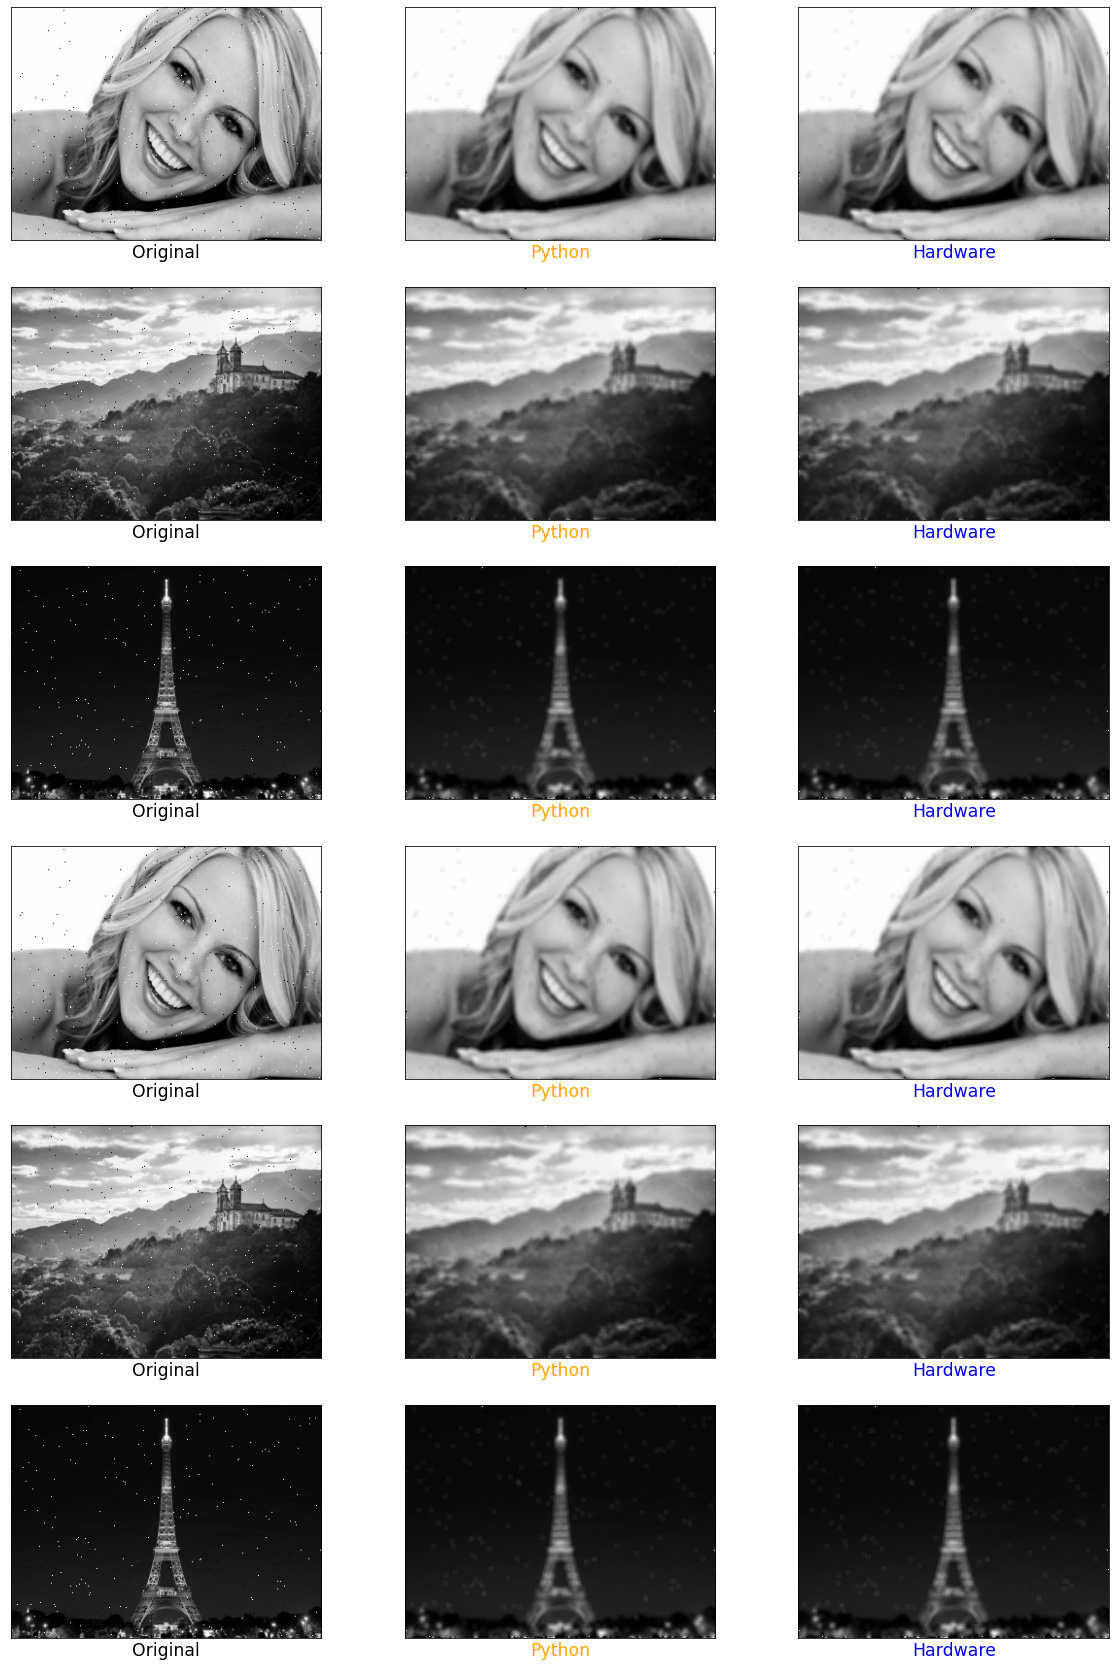

In [20]:
# compara imagens processadas em python com as processadas em hardware

plt.figure(figsize=(20, 5*n_img_out))
for i in range(0, n_img_out):
  plt.subplot(n_img_out, 3, i*3+1); plt.imshow(imagens[i%n_imagens], cmap='gray', vmin=0, vmax=255)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("Original", color='black', size='xx-large')  

  plt.subplot(n_img_out, 3, i*3+2); plt.imshow(imagens_py[i%n_imagens], cmap='gray', vmin=0, vmax=255)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("Python", color='orange', size='xx-large')

  plt.subplot(n_img_out, 3, i*3+3); plt.imshow(imagens_saida[i], cmap='gray', vmin=0, vmax=255)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("Hardware", color='blue', size='xx-large')

In [22]:
for i in range(0, n_img_out):
  print("Erro imagem %d: %.4f"%( i+1, root_squared_error(imagens_py[i%n_imagens], imagens_saida[i])))

Erro imagem 1: 0.0000
Erro imagem 2: 0.0000
Erro imagem 3: 0.0000
Erro imagem 4: 0.0000
Erro imagem 5: 0.0000
Erro imagem 6: 0.0000
